In [1]:
import numpy as np
import cv2 as cv
import va

""
""

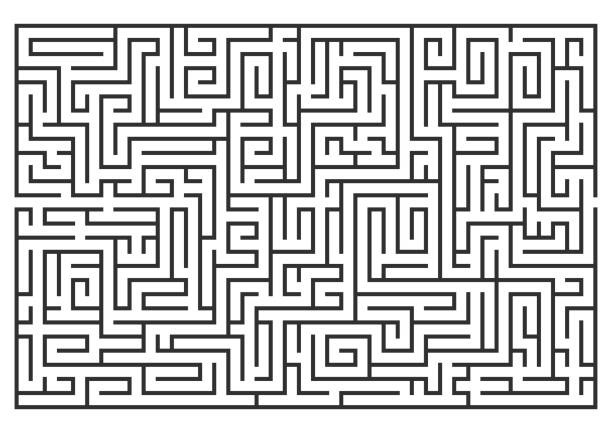

In [2]:
img = cv.imread("./labirinto.jpg", cv.IMREAD_GRAYSCALE)
va.show(img)

""
""

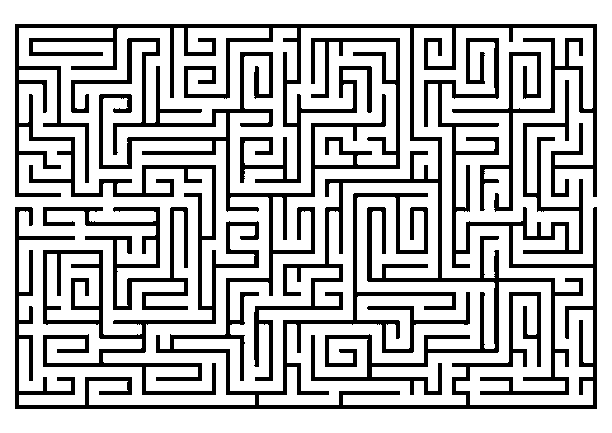

In [6]:
_, bin_img = cv.threshold(img, -1, 255, cv.THRESH_OTSU)
va.show(bin_img)

""
""

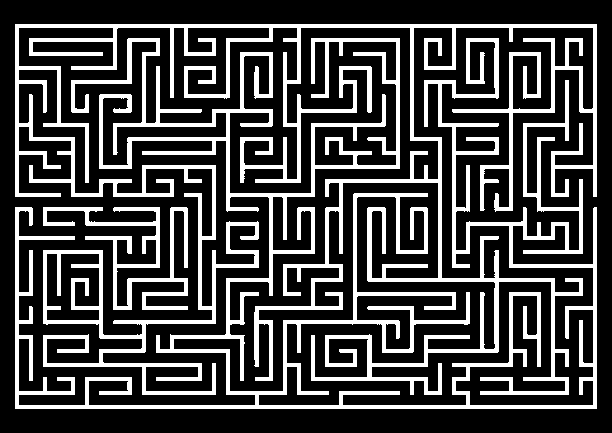

In [8]:
n_img = np.zeros_like(bin_img)
n_img[bin_img == 0] = 255
va.show(n_img)

""
""

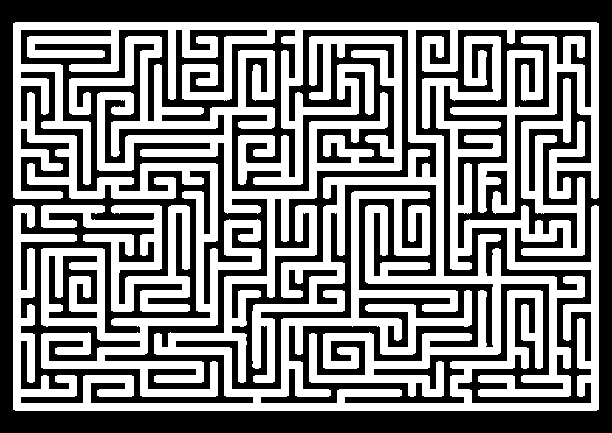

In [16]:
se = cv.getStructuringElement(cv.MORPH_ELLIPSE, (5,5))
d = cv.morphologyEx(n_img, cv.MORPH_DILATE, se)
va.show(d)

""
""

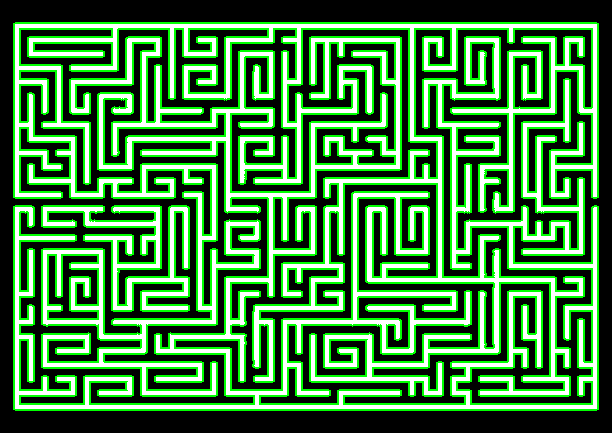

In [17]:
d1 = cv.cvtColor(d, cv.COLOR_GRAY2BGR)
d1[d!=n_img] = (0, 255, 0) # prendo i bordi aggiunti e li coloro, coloro solamente quelli aggiunti tramite DILATAZIONE
va.show(d1)

## Apertura e Chiusura
* Apertura: erosione seguita da dilatazione, seprata oggetti debolmente connessi e rimuove regioni piccole
* Chiusura: dilatazione seguita da erosione, riempie buchi e piccole concavità e rafforza la connessione di regioni unite debolmente

## Trasformata Distanza

original,binary not inverted,binary,distance D4,ColorMap D4,distance D8,ColorMap D8
,,,,,,

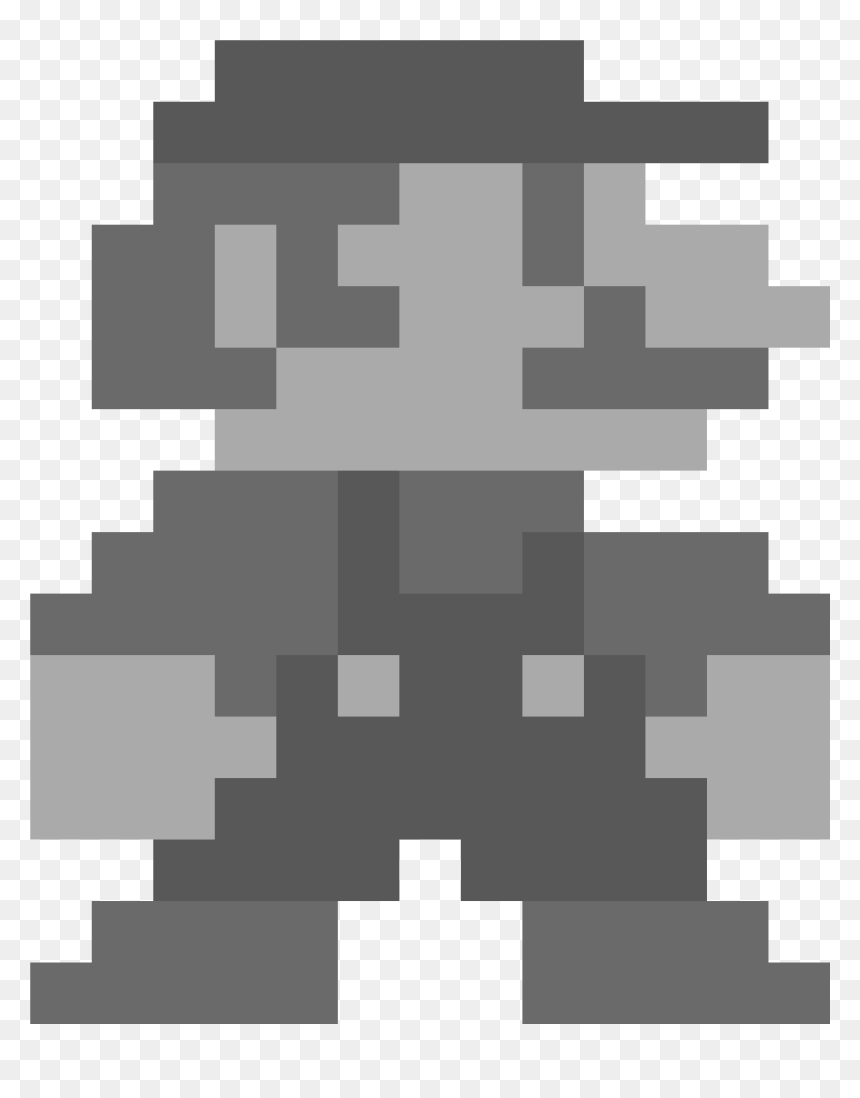
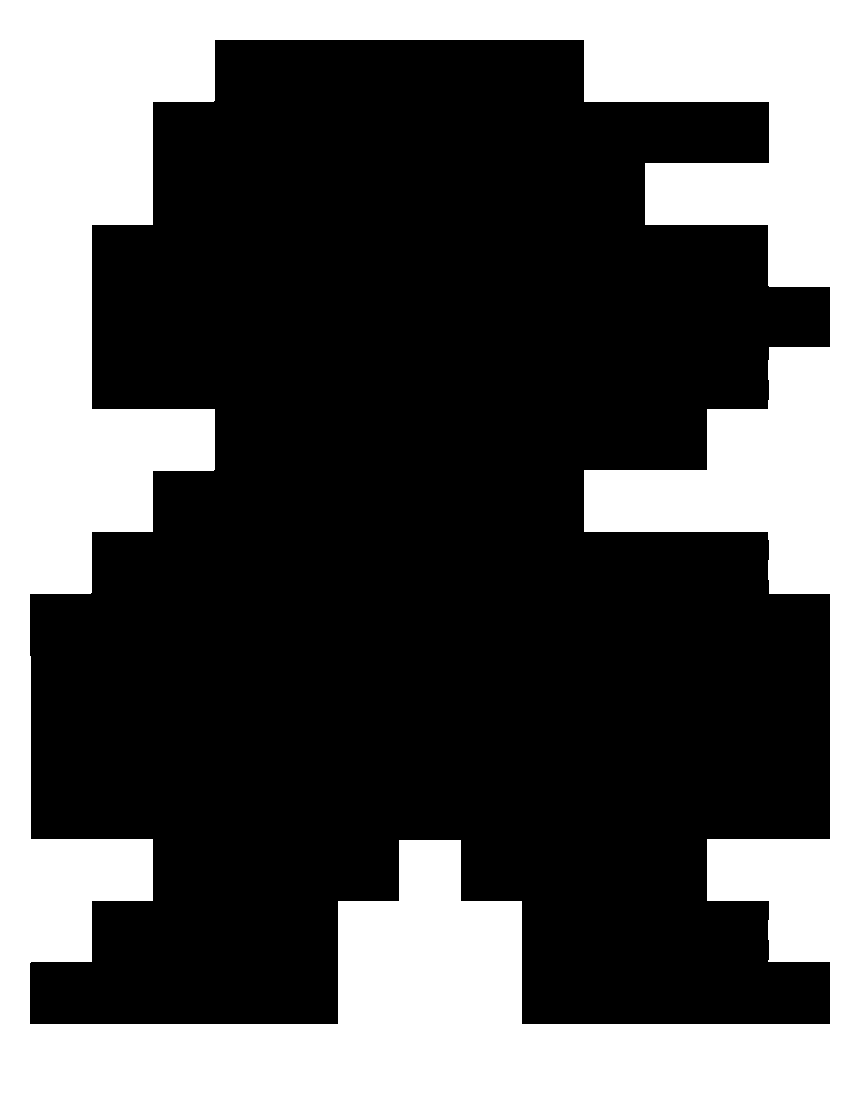
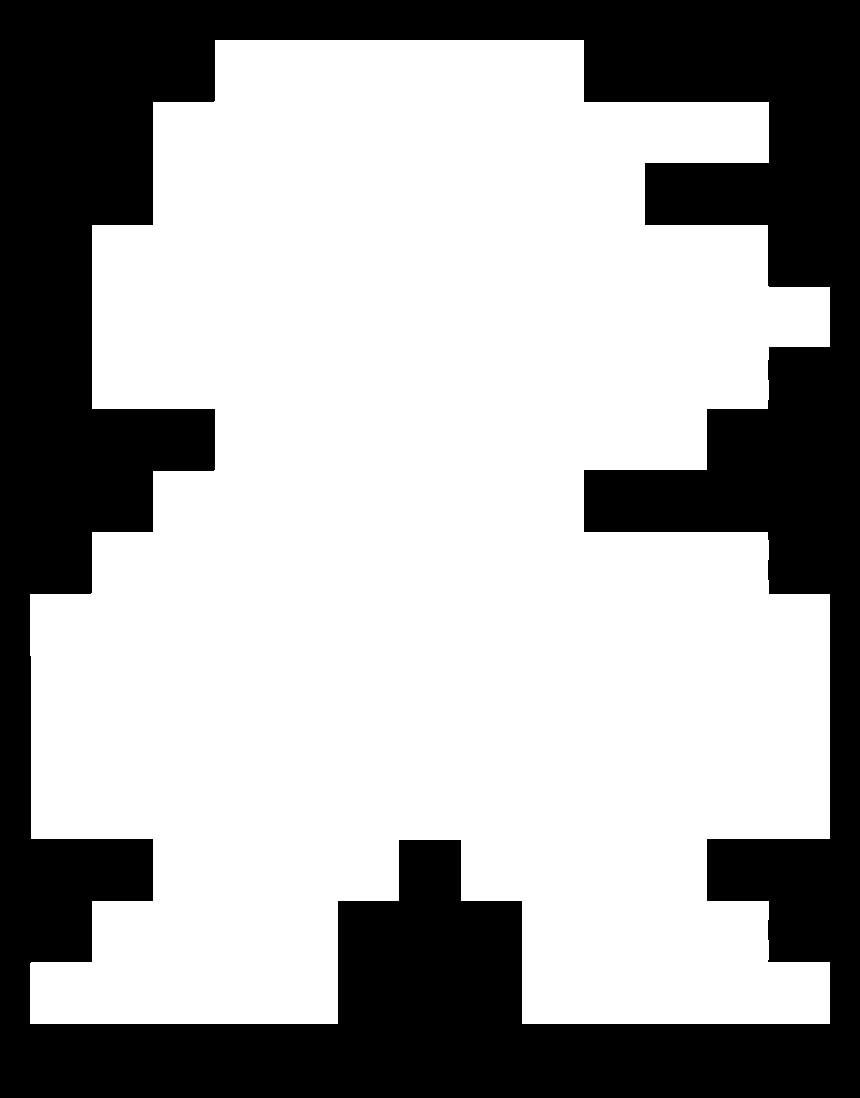
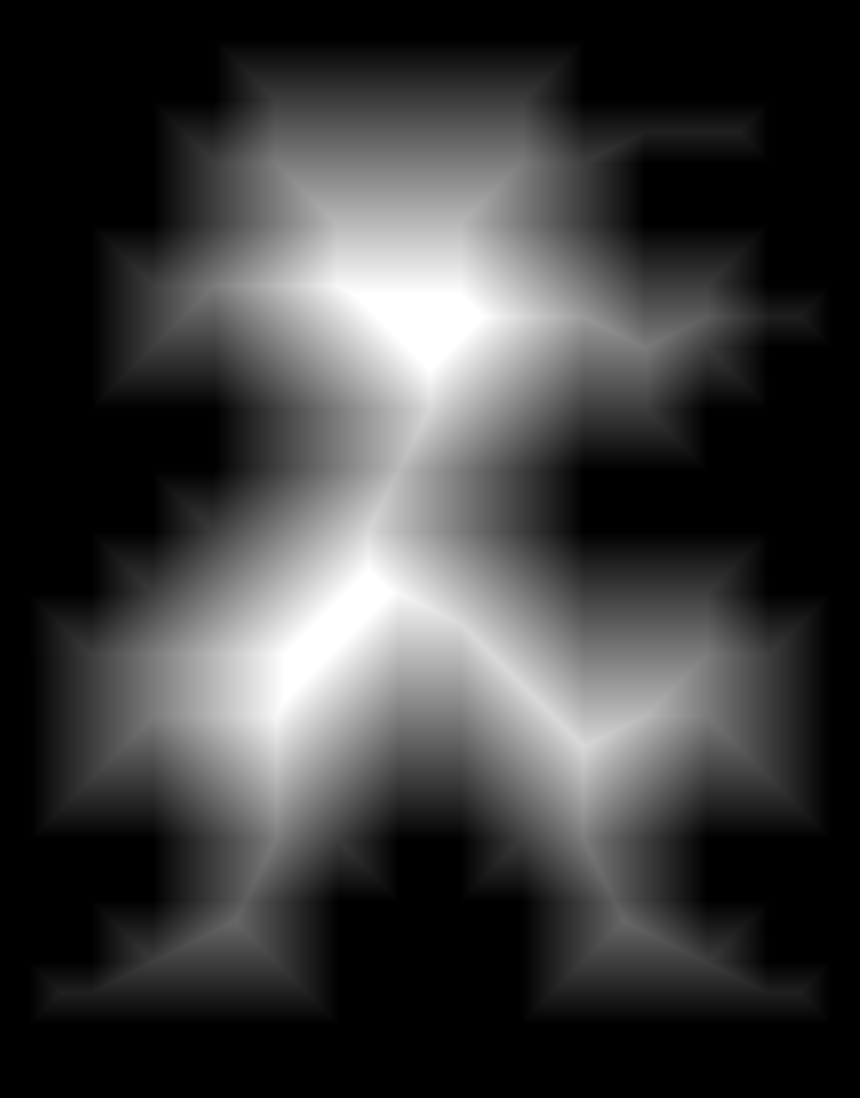
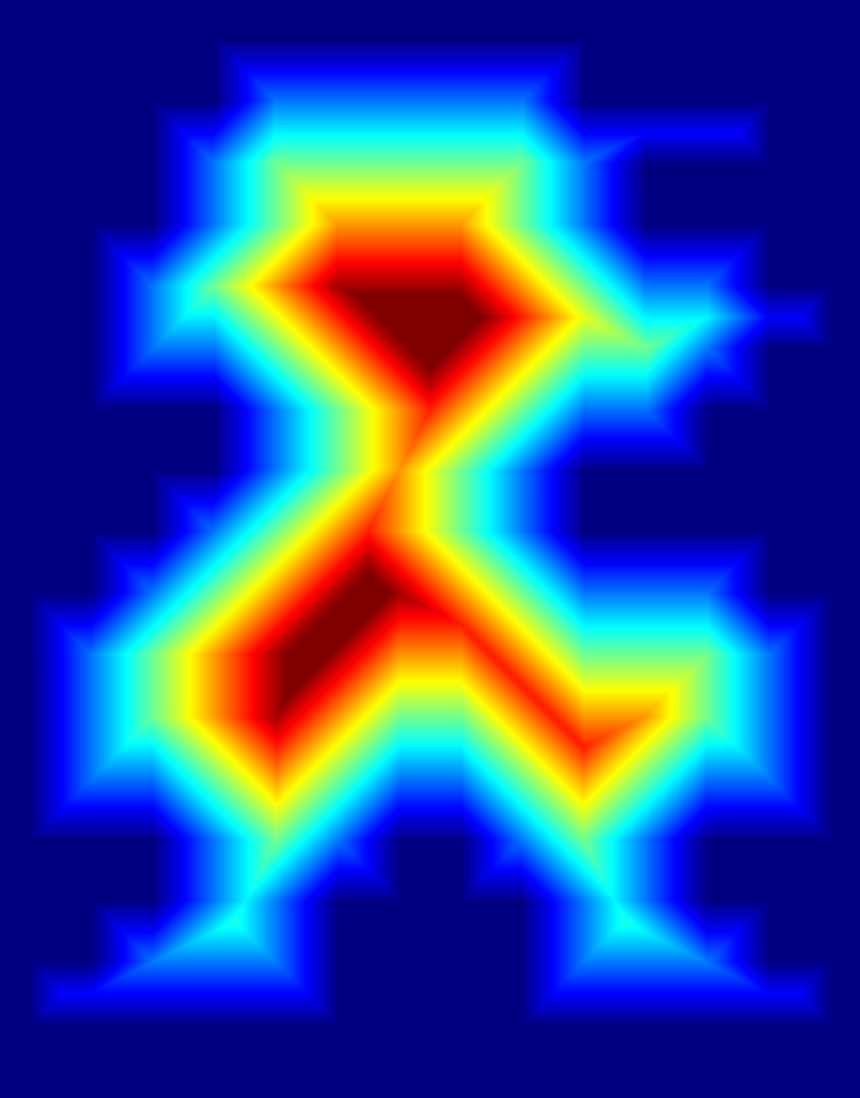
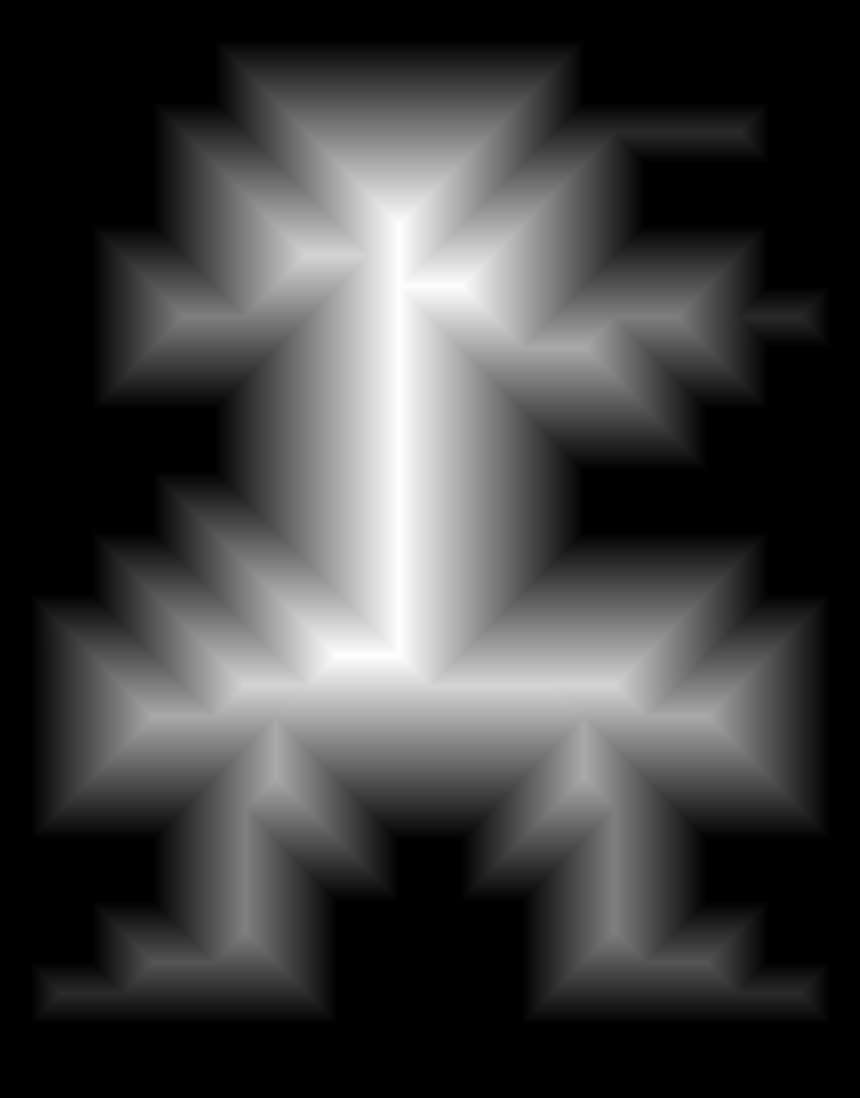
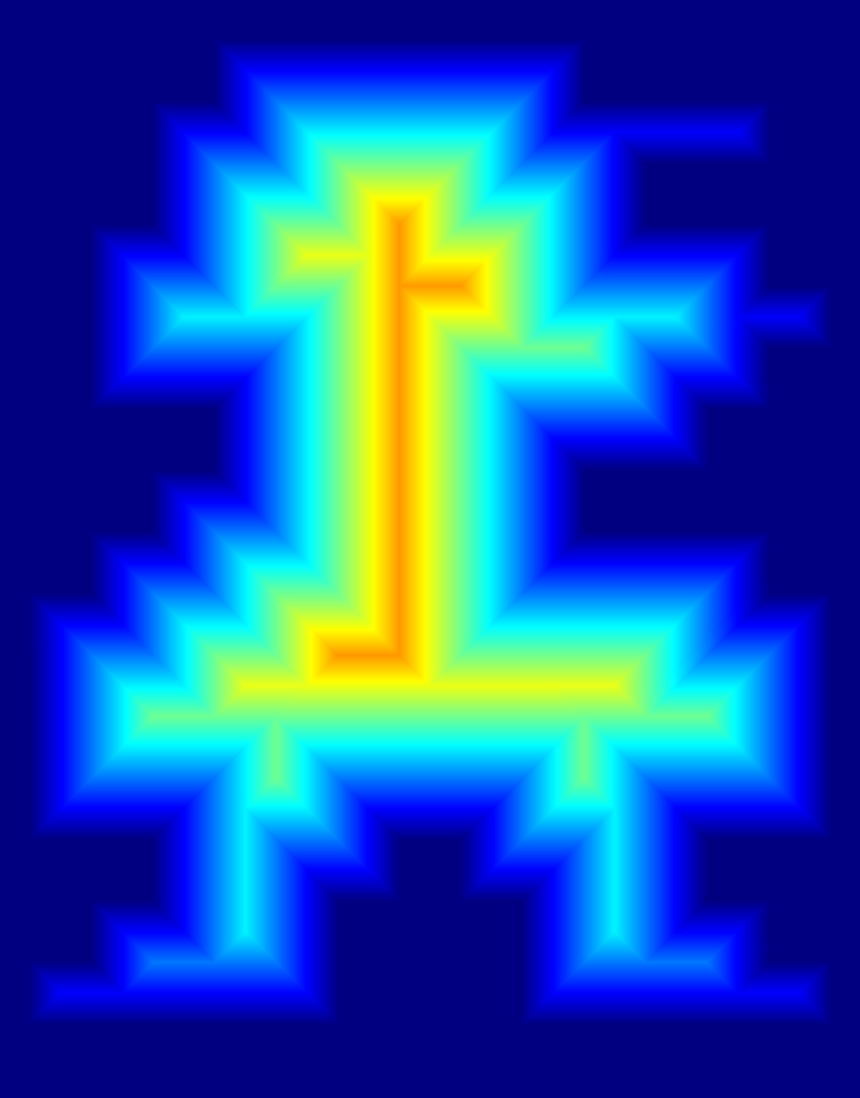

In [46]:
mario = cv.imread("./mario2.png", cv.IMREAD_GRAYSCALE)
_, img_bn = cv.threshold(mario, -1, 255, cv.THRESH_OTSU)
img = 255 - img_bn
dt4 = cv.distanceTransform(img, cv.DIST_L1, 3, None, dstType=cv.CV_8UC1)
dt8 = cv.distanceTransform(img, cv.DIST_C, 3, None,  dstType=cv.CV_8UC1)
arr = np.uint8(dt8) # Siccome la distanza D8 restituisce un array di tipo FLOAT 32
col_dt4 = cv.applyColorMap(dt4, cv.COLORMAP_JET, None)
col_dt8 = cv.applyColorMap(arr, cv.COLORMAP_JET, None)
va.show((mario, "original"), (img_bn, "binary not inverted"), (img, "binary"), (dt4, "distance D4"), (col_dt4, "ColorMap D4"), (dt8, "distance D8"), (col_dt8, "ColorMap D8"))

""
""

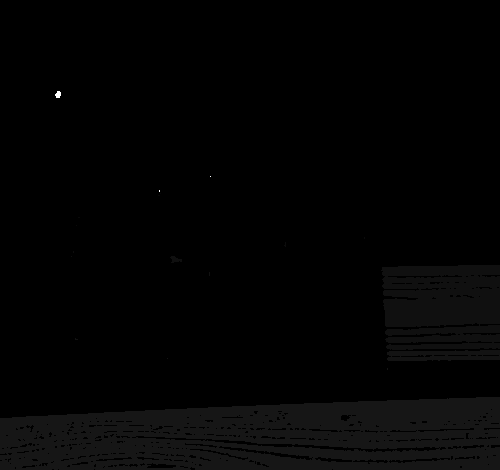

In [13]:
img = cv.imread("./bulloni.jpg", cv.IMREAD_GRAYSCALE)
bn = cv.adaptiveThreshold(img, 255, cv.ADAPTIVE_THRESH_MEAN_C, cv.THRESH_BINARY, 9, 10)
n, cc, stats, _ = cv.connectedComponentsWithStats(bn)
mask = cc.copy()

mask[np.isin(cc, [1, 2, 4])] = 0    #set to 0 the components 1, 2, 4
mask[np.isin(cc, [3, 5, 6])] = 255  #set to 255 all the components 3, 5, 6
va.show(mask)

mask,new image after mask
,

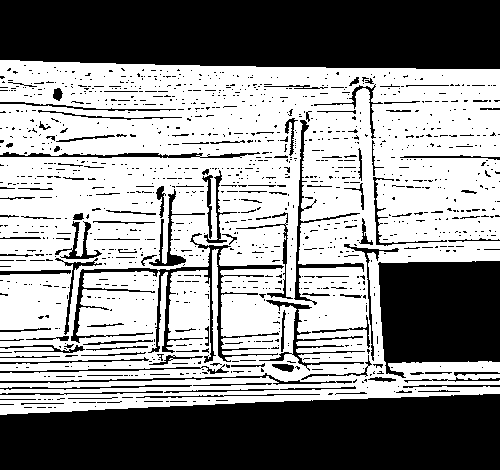
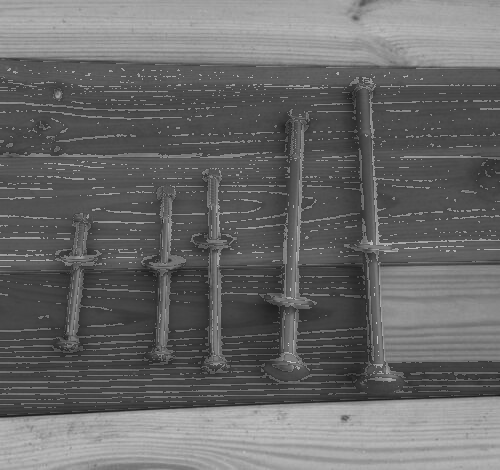

In [12]:
img = cv.imread("./bulloni.jpg", cv.IMREAD_GRAYSCALE)
bn = cv.adaptiveThreshold(img, 255, cv.ADAPTIVE_THRESH_MEAN_C, cv.THRESH_BINARY, 9, 10)
n, cc, stats, _ = cv.connectedComponentsWithStats(bn)
mask = cc.copy()
max_v = np.max(stats[1:, cv.CC_STAT_AREA])
for i in range(1, n):
    if stats[i, cv.CC_STAT_AREA] < max_v:
        mask[cc == i] = 0
img[mask > 0] //= 2
va.show((mask, "mask"), (img, "new image after mask"))

,,,
,,,

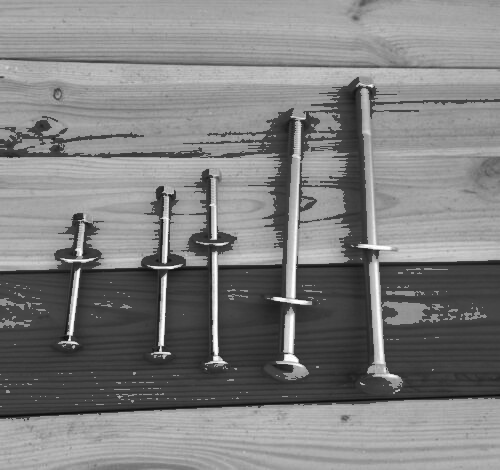
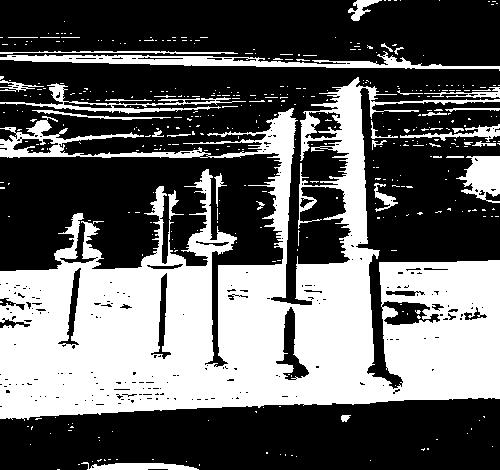
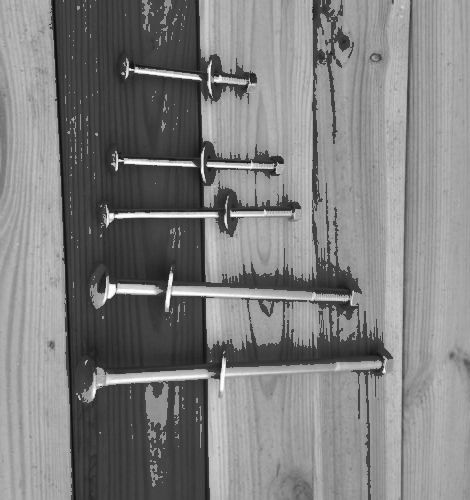
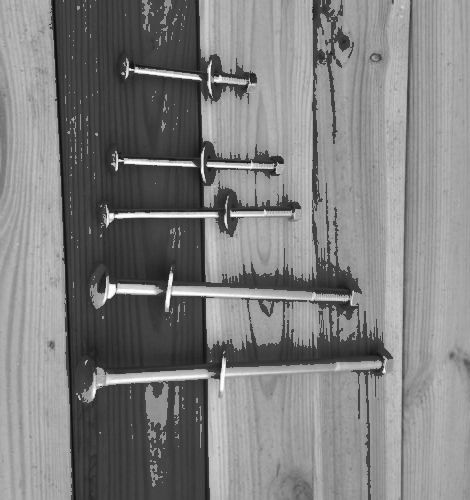

In [50]:
img = cv.imread("./bulloni.jpg", cv.IMREAD_GRAYSCALE)
rotated = np.rot90(img, -1)
rotated2 = np.rot90(img, -1)
_, bn = cv.threshold(img, -1, 255, cv.THRESH_OTSU)
bn = 255 - bn
n, cc, stats, _ = cv.connectedComponentsWithStats(bn)
max_area = stats[1:, cv.CC_STAT_AREA].max()
m = cc.copy()
for i in range(1, n):
    if stats[i, cv.CC_STAT_AREA] < max_area:
        m[cc == i] = 0
img[m > 0] //= 2
va.show(img, bn, rotated, rotated2)
